In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [75]:
import pickle
with open('raw_data_20181008.pickle', 'rb') as handle:
    raw_data = pickle.load(handle)

In [76]:
len(raw_data)

202

In [77]:
copy_keys = list(raw_data.keys())
for stock in copy_keys:
    if len(raw_data[stock].loc[:'2013-01-01']) < 1:
        del raw_data[stock]
del copy_keys

In [78]:
len(raw_data)

182

In [79]:
# stock에서 Volume==0인 index, stock에서 제외
for key, df in raw_data.items():
    raw_data[key] = df.drop(df.index[np.where(df.Volume==0)[0]], axis=0)

In [80]:
for key, df in raw_data.items():
    del df['Adj Close']

In [81]:
raw_data['삼성전자'].head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,16060.0,16180.0,16000.0,16180.0,11950800
2010-01-05,16520.0,16580.0,16300.0,16440.0,27925850
2010-01-06,16580.0,16820.0,16520.0,16820.0,22948850
2010-01-07,16820.0,16820.0,16260.0,16260.0,22107950
2010-01-08,16400.0,16420.0,16120.0,16420.0,14777550


In [82]:
for key, df in raw_data.items():
    df.Volume = df.Volume / 1e7

In [83]:
raw_data['삼성전자'].head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,16060.0,16180.0,16000.0,16180.0,1.195080
2010-01-05,16520.0,16580.0,16300.0,16440.0,2.792585
2010-01-06,16580.0,16820.0,16520.0,16820.0,2.294885
2010-01-07,16820.0,16820.0,16260.0,16260.0,2.210795
2010-01-08,16400.0,16420.0,16120.0,16420.0,1.477755


In [84]:
for key, df in raw_data.items():
    print(key)
    for i in range(1, 11):
        df['returnsCloseNext{}'.format(i)] = np.log(df['Close'].shift(-1*i) / df['Open'])

    # Moving Average
    df['close_ma_50'] = df.Close.rolling(50).mean()

    # Return of Change
    df['roc_1'] = df.Close.pct_change(periods=1)
    df['roc_2'] = df.Close.pct_change(periods=2)

    # RSI
    U = np.where(df.Close.diff(1) > 0, df.Close.diff(1), 0)
    D = np.where(df.Close.diff(1) < 0, df.Close.diff(1)*(-1), 0)
    m_N = 10
    AU = pd.DataFrame(U).rolling(window=m_N, min_periods=m_N).mean()
    AD = pd.DataFrame(D).rolling(window=m_N, min_periods=m_N).mean()
    RSI = AU.div(AD+AU)*100
    df['rsi_10'] = RSI.values

    # CV
    df['his_vol_10'] = df.Close.rolling(10).std() / df.Close.rolling(10).mean()

    # William%R
    n = 14
    W_R = -100 * ((df.High.rolling(n).max() - df.Close) / 
       (df.High.rolling(n).max() - df.Low.rolling(n).min()))
    df['w_r'] = W_R

    # Stochastic Oscillator
    percent_K = 100 * ((df.Close - df.Low.rolling(n).min()) / 
       (df.High.rolling(n).max() - df.Low.rolling(n).min()))
    sto_slowD = percent_K.rolling(3).mean().rolling(3).mean()
    df['sto_slowD'] = sto_slowD

    # Commodity Channel Index
    TP = (df.Close + df.Low + df.High) / 3
    window = 20
    dataX = []
    for i in range(len(TP) - window+1):
        a = TP.values[i:(i+window)]
        dataX.append(a)
    dataMean = [i.mean() for i in dataX]
    AVEDEV = [abs(x - mean).mean() for x, mean 
              in zip(dataX, dataMean)]
    for i in range(window-1):
        AVEDEV.insert(0,np.nan)
    AVEDEV = pd.Series(AVEDEV, index = TP.index)
    CCI = (TP - TP.rolling(20).mean()) / (0.015 * AVEDEV)
    df['cci'] = CCI

    # Disparity Index
    DI5 = 100 * ((df.Close - df.Close.rolling(5).mean()) / 
                df.Close.rolling(5).mean())
    DI10 = 100 * ((df.Close - df.Close.rolling(10).mean()) / 
                df.Close.rolling(10).mean())
    df['di5'] = DI5
    df['di10'] = DI10

    # Volume Prce Trend
    VPT = pd.Series(index=df.index)
    VPT.iloc[0] = 0
    for n in range(1, len(VPT)):
        VPT.iloc[n] = VPT.iloc[n-1] + ((df.Close.diff(1) / df.Close) * df.Volume).iloc[n]
    df['vpt'] = VPT

AK홀딩스
BNK금융지주
CJ
CJ CGV
CJ대한통운
CJ제일제당
DB손해보험
DB하이텍
GKL
GS
GS건설
GS리테일
HDC
JW중외제약
JW홀딩스
KB금융
KCC
KT
KT&G
LF
LG
LG디스플레이
LG상사
LG생활건강
LG유플러스
LG이노텍
LG전자
LG하우시스
LG화학
LS
LS산전
NAVER
NH투자증권
OCI
POSCO
S&T모티브
S-Oil
SBS
SK
SKC
SK네트웍스
SK디스커버리
SK이노베이션
SK텔레콤
SK하이닉스
SPC삼립
강원랜드
고려아연
고려제강
금호석유
금호타이어
기아차
기업은행
남양유업
남해화학
넥센타이어
녹십자
녹십자홀딩스
농심
대교
대덕전자
대림산업
대상
대우건설
대우조선해양
대웅제약
대한유화
대한항공
동국제강
동서
동아쏘시오홀딩스
동양
동원F&B
동원시스템즈
두산
두산인프라코어
두산중공업
락앤락
롯데쇼핑
롯데정밀화학
롯데지주
롯데칠성
롯데케미칼
롯데푸드
롯데하이마트
메리츠종금증권
무학
미래에셋대우
보령제약
부광약품
빙그레
삼성SDI
삼성생명
삼성엔지니어링
삼성전기
삼성전자
삼성중공업
삼성증권
삼성카드
삼성화재
삼양사
삼양홀딩스
세방전지
세아베스틸
세아제강
셀트리온
신세계
신한지주
쌍용양회
쌍용차
아모레G
아모레퍼시픽
아이에스동서
에스엘
에스원
엔씨소프트
영원무역
영진약품
영풍
오뚜기
오리온홀딩스
우리은행
유니드
유한양행
이마트
일양약품
일진머티리얼즈
제일기획
카카오
코오롱인더
코웨이
태광산업
팜스코
팬오션
포스코대우
풍산
하나금융지주
하이트진로
한국가스공사
한국금융지주
한국단자
한국쉘석유
한국전력
한국콜마
한국타이어
한국타이어월드와이드
한국항공우주
한라홀딩스
한미사이언스
한미약품
한샘
한섬
한세실업
한솔케미칼
한온시스템
한올바이오파마
한일시멘트
한전KPS
한전기술
한진중공업
한화
한화생명
한화에어로스페이스
한화케미칼
현대건설
현대그린푸드
현대글로비스
현대리바트
현대모비스
현대미포조선
현대백화점
현대엘리베이
현대위아
현대제철
현대중공업
현대차
현대해상
현대홈쇼핑
호텔신라
효성
후성
휴켐스


In [85]:
raw_data['삼성전자'].head()

,Open,High,Low,Close,Volume,returnsCloseNext1,returnsCloseNext2,returnsCloseNext3,returnsCloseNext4,returnsCloseNext5,...,roc_1,roc_2,rsi_10,his_vol_10,w_r,sto_slowD,cci,di5,di10,vpt
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,16060.0,16180.0,16000.0,16180.0,1.195080,0.023386,0.046237,0.012376,0.022168,-0.007500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2010-01-05,16520.0,16580.0,16300.0,16440.0,2.792585,0.017997,-0.015864,-0.006072,-0.035740,-0.020796,...,0.016069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044165
2010-01-06,16580.0,16820.0,16520.0,16820.0,2.294885,-0.019489,-0.009697,-0.039365,-0.024421,-0.039365,...,0.023114,0.039555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096011
2010-01-07,16820.0,16820.0,16260.0,16260.0,2.210795,-0.024069,-0.053737,-0.038793,-0.053737,-0.016787,...,-0.033294,-0.010949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019871
2010-01-08,16400.0,16420.0,16120.0,16420.0,1.477755,-0.028450,-0.013505,-0.028450,0.008500,0.026476,...,0.009840,-0.023781,NaN,NaN,NaN,NaN,NaN,-0.024355,NaN,0.034270


In [89]:
for key, df in raw_data.items():
    raw_data[key] = df.dropna()

In [91]:
y_li = [col for col in raw_data['삼성전자'].columns if col.find('Next') != -1]
X_li = [col for col in raw_data['삼성전자'].columns if col.find('Next') == -1]

In [92]:
y_li

['returnsCloseNext1',
 'returnsCloseNext2',
 'returnsCloseNext3',
 'returnsCloseNext4',
 'returnsCloseNext5',
 'returnsCloseNext6',
 'returnsCloseNext7',
 'returnsCloseNext8',
 'returnsCloseNext9',
 'returnsCloseNext10']

In [93]:
X_li

['Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'close_ma_50',
 'roc_1',
 'roc_2',
 'rsi_10',
 'his_vol_10',
 'w_r',
 'sto_slowD',
 'cci',
 'di5',
 'di10',
 'vpt']

In [94]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()

In [96]:
for key, df in raw_data.items():
    raw_data[key] = df.loc['2013-01-01':]

In [97]:
from sklearn import metrics

In [98]:
result = {}
start = time.time()
y = 'returnsCloseNext1'
for key, df in raw_data.items():
    semi_start = time.time()
    
    train_data = df.iloc[:int(0.8*len(df))][X_li].values
    train_label = df.iloc[:int(0.8*len(df))][y].values
    test_data = df.iloc[int(0.8*len(df)):][X_li].values
    test_label = df.iloc[int(0.8*len(df)):][y]
    xgb_reg = XGBRegressor()
    xgb_reg.fit(train_data, train_label)
    pred = pd.Series(xgb_reg.predict(test_data), index=test_label.index)
    rmse = metrics.mean_squared_error(test_label.values, pred.values) ** .5
    accuracy = metrics.accuracy_score(np.where(test_label.values>0, 1, 0), 
                       np.where(pred.values>0, 1, 0))
    result[key] = [rmse, accuracy, pred]
    
    semi_elapse = time.time() - semi_start
    print('Done :', key, '\n\t{:.4f} sec'.format(semi_elapse))

Done : AK홀딩스 
	0.1536 sec
Done : BNK금융지주 
	0.1217 sec
Done : CJ 
	0.1286 sec
Done : CJ CGV 
	0.1197 sec
Done : CJ대한통운 
	0.1177 sec
Done : CJ제일제당 
	0.1177 sec
Done : DB손해보험 
	0.1147 sec
Done : DB하이텍 
	0.1237 sec
Done : GKL 
	0.1297 sec
Done : GS 
	0.1107 sec
Done : GS건설 
	0.1356 sec
Done : GS리테일 
	0.1167 sec
Done : HDC 
	0.1326 sec
Done : JW중외제약 
	0.1237 sec
Done : JW홀딩스 
	0.1257 sec
Done : KB금융 
	0.1107 sec
Done : KCC 
	0.1246 sec
Done : KT 
	0.1147 sec
Done : KT&G 
	0.1257 sec
Done : LF 
	0.1107 sec
Done : LG 
	0.1077 sec
Done : LG디스플레이 
	0.1197 sec
Done : LG상사 
	0.1187 sec
Done : LG생활건강 
	0.1147 sec
Done : LG유플러스 
	0.1167 sec
Done : LG이노텍 
	0.1237 sec
Done : LG전자 
	0.1167 sec
Done : LG하우시스 
	0.1307 sec
Done : LG화학 
	0.1306 sec
Done : LS 
	0.1247 sec
Done : LS산전 
	0.1147 sec
Done : NAVER 
	0.1187 sec
Done : NH투자증권 
	0.1206 sec
Done : OCI 
	0.1167 sec
Done : POSCO 
	0.1267 sec
Done : S&T모티브 
	0.1377 sec
Done : S-Oil 
	0.1356 sec
Done : SBS 
	0.1237 sec
Done : SK 
	0.1167 sec
Done : SKC

In [103]:
for key, data in result.items():
    print(key, '\n\t RMSE:{:.3f}\tAccuracy:{:.4f}'.format(data[0], data[1]))

AK홀딩스 
	 RMSE:0.020	Accuracy:0.6643
BNK금융지주 
	 RMSE:0.016	Accuracy:0.7000
CJ 
	 RMSE:0.019	Accuracy:0.7036
CJ CGV 
	 RMSE:0.025	Accuracy:0.7107
CJ대한통운 
	 RMSE:0.024	Accuracy:0.7107
CJ제일제당 
	 RMSE:0.018	Accuracy:0.6964
DB손해보험 
	 RMSE:0.019	Accuracy:0.6393
DB하이텍 
	 RMSE:0.030	Accuracy:0.7143
GKL 
	 RMSE:0.027	Accuracy:0.6500
GS 
	 RMSE:0.018	Accuracy:0.6821
GS건설 
	 RMSE:0.032	Accuracy:0.6893
GS리테일 
	 RMSE:0.036	Accuracy:0.6143
HDC 
	 RMSE:0.037	Accuracy:0.6582
JW중외제약 
	 RMSE:0.024	Accuracy:0.6964
JW홀딩스 
	 RMSE:0.028	Accuracy:0.6750
KB금융 
	 RMSE:0.021	Accuracy:0.6107
KCC 
	 RMSE:0.022	Accuracy:0.7036
KT 
	 RMSE:0.011	Accuracy:0.6964
KT&G 
	 RMSE:0.016	Accuracy:0.6786
LF 
	 RMSE:0.026	Accuracy:0.6500
LG 
	 RMSE:0.019	Accuracy:0.6071
LG디스플레이 
	 RMSE:0.029	Accuracy:0.6679
LG상사 
	 RMSE:0.026	Accuracy:0.6071
LG생활건강 
	 RMSE:0.040	Accuracy:0.5893
LG유플러스 
	 RMSE:0.023	Accuracy:0.6929
LG이노텍 
	 RMSE:0.033	Accuracy:0.6393
LG전자 
	 RMSE:0.027	Accuracy:0.6321
LG하우시스 
	 RMSE:0.018	Accuracy:0.6679
LG화학 


In [104]:
rmse = [data[0] for key, data in result.items()]
acc = [data[1] for key, data in result.items()]

In [106]:
np.mean(acc)

0.6613342415224517

In [107]:
np.mean(rmse)

0.02844748098460159

In [108]:
result['삼성전자'][2]

Date
2017-07-13    0.014816
2017-07-14    0.011423
2017-07-17    0.011433
2017-07-18    0.010429
2017-07-19    0.004277
2017-07-20    0.012474
2017-07-21    0.005050
2017-07-24    0.005917
2017-07-25   -0.007747
2017-07-26    0.003935
2017-07-27    0.009542
2017-07-28   -0.025236
2017-07-31    0.015001
2017-08-01    0.012442
2017-08-02    0.012025
2017-08-03   -0.017207
2017-08-04    0.007093
2017-08-07    0.006573
2017-08-08    0.013285
2017-08-09   -0.013859
2017-08-10   -0.002544
2017-08-11   -0.011030
2017-08-14    0.013637
2017-08-16    0.027424
2017-08-17    0.014821
2017-08-18    0.004739
2017-08-21    0.007006
2017-08-22    0.008979
2017-08-23    0.008919
2017-08-24    0.008404
                ...   
2018-08-01    0.006206
2018-08-02   -0.010435
2018-08-03    0.013098
2018-08-06    0.015732
2018-08-07    0.015354
2018-08-08    0.008644
2018-08-09    0.005450
2018-08-10   -0.009870
2018-08-13    0.000961
2018-08-14    0.012145
2018-08-16   -0.005281
2018-08-17    0.011285
2018-0

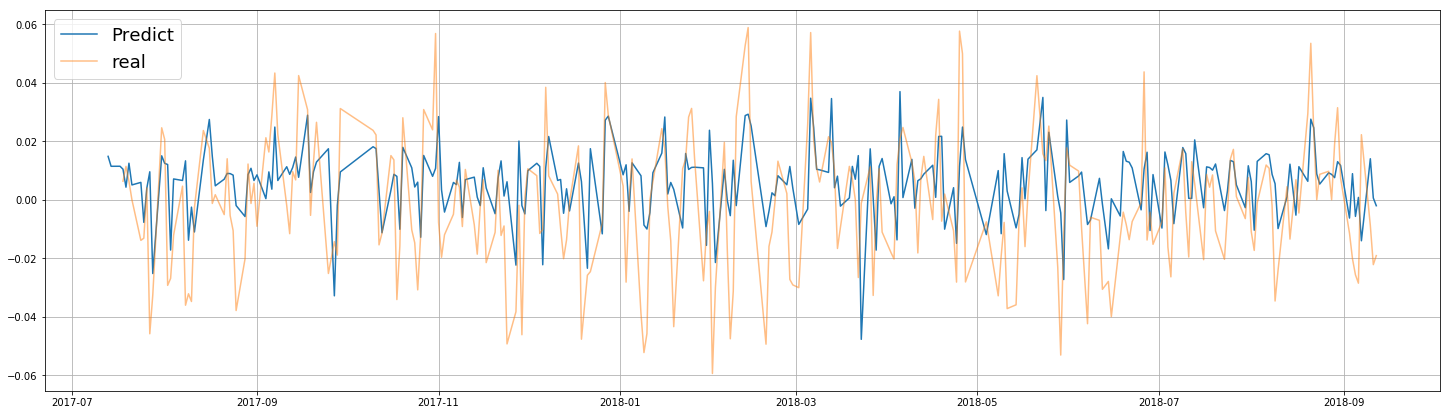

In [109]:
plt.figure(figsize=(25,7))
plt.plot(result['삼성전자'][2], label='Predict', alpha=1)
plt.plot(raw_data['삼성전자'].iloc[int(0.8*len(df)):][y], label='real', alpha=.5)
plt.grid(True)
plt.legend(fontsize=18)

In [128]:
real = raw_data['삼성전자'].iloc[int(0.8*len(raw_data['삼성전자'])):]

Text(0.5,1,'1일 후 예측')

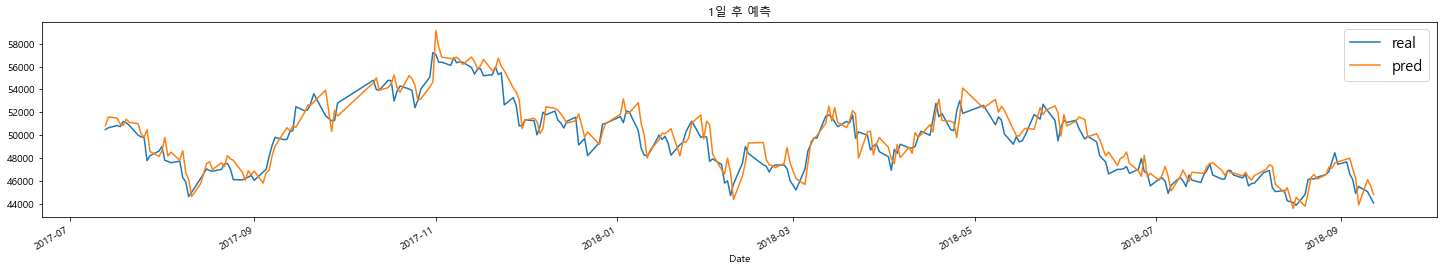

In [137]:
t = pd.concat((np.exp(real[y] + np.log(real['Open'])), 
               np.exp(result['삼성전자'][2] + np.log(real['Open']))), 
              axis=1)
t.columns = ['real', 'pred']
t.plot(figsize=(25,4))
plt.legend(fontsize=15)
plt.title('1일 후 예측')